In [9]:
import mysql.connector
import pandas as pd
import folium
import json
import requests

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 자치구별 총 대여 수 집계
query = """
SELECT station_gu, SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df = pd.read_sql(query, conn)
conn.close()

# ✅ GeoJSON 데이터 로드
geo_url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_municipalities_geo_simple.json"
geo_data = requests.get(geo_url).json()

# ✅ 서울시 자치구 리스트 (df에도 있는 값 기준)
seoul_gus = df['station_gu'].unique().tolist()

# ✅ GeoJSON 필터링: 서울 자치구만 남기기
seoul_only = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in geo_data['features']
        if feature['properties']['name'] in seoul_gus
    ]
}

# ✅ 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# ✅ Choropleth 시각화
folium.Choropleth(
    geo_data=seoul_only,
    data=df,
    columns=['station_gu', 'total_rentals'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='자치구별 따릉이 대여량'
).add_to(m)

m


/tmp/ipykernel_8608/1456933589.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import seaborn as sns
# 1. 폰트 경로
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 2. global 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False


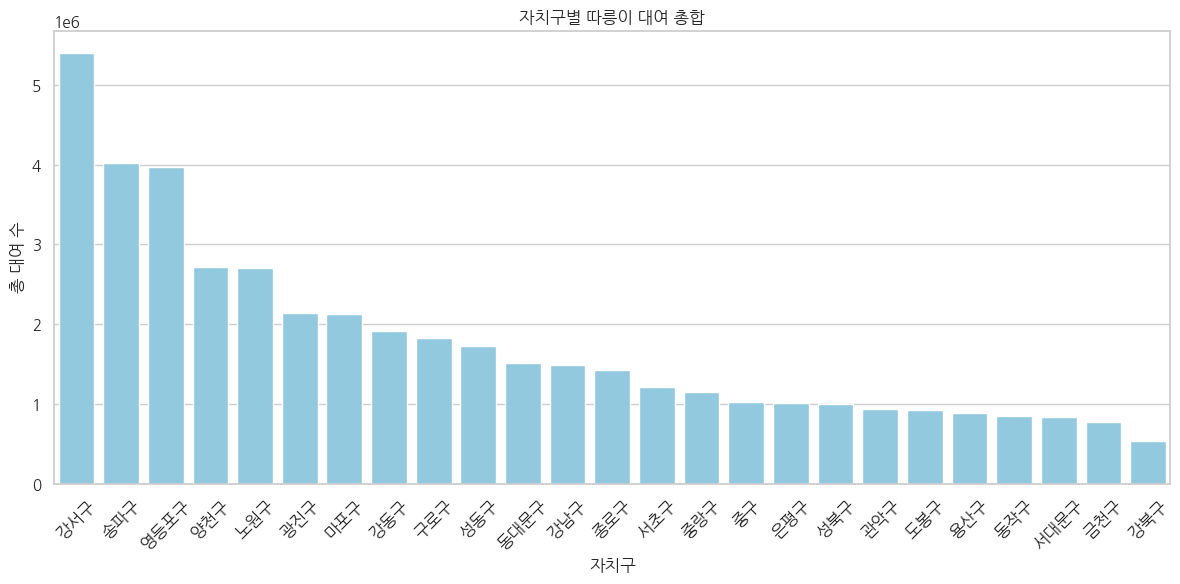

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='station_gu', y='total_rentals', color='skyblue')

plt.xticks(rotation=45, fontproperties=fontprop)
plt.title('자치구별 따릉이 대여 총합', fontproperties=fontprop)
plt.xlabel('자치구', fontproperties=fontprop)
plt.ylabel('총 대여 수', fontproperties=fontprop)

plt.tight_layout()
plt.show()


In [27]:


# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 데이터 가져오기
query = """
SELECT gu_name, SUM(
    age_0_9 + age_10 + age_15 + age_20 + age_25 +
    age_30 + age_35 + age_40 + age_45 + age_50 +
    age_55 + age_60 + age_65 + age_70
) AS total_population
FROM living_population
GROUP BY gu_name;
"""
living_df = pd.read_sql(query, conn)
conn.close()

# ✅ GeoJSON 불러오기
geo_url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_municipalities_geo_simple.json"
geo_data_all = requests.get(geo_url).json()

# ✅ 서울 자치구만 필터링
seoul_gus = living_df["gu_name"].unique().tolist()
seoul_geo = {
    "type": "FeatureCollection",
    "features": [
        f for f in geo_data_all["features"]
        if f["properties"]["name"] in seoul_gus
    ]
}

# ✅ 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# ✅ Choropleth 시각화
folium.Choropleth(
    geo_data=seoul_geo,
    data=living_df,
    columns=["gu_name", "total_population"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="자치구별 생활인구 (총합)"
).add_to(m)

m


/tmp/ipykernel_8608/1039693184.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  living_df = pd.read_sql(query, conn)


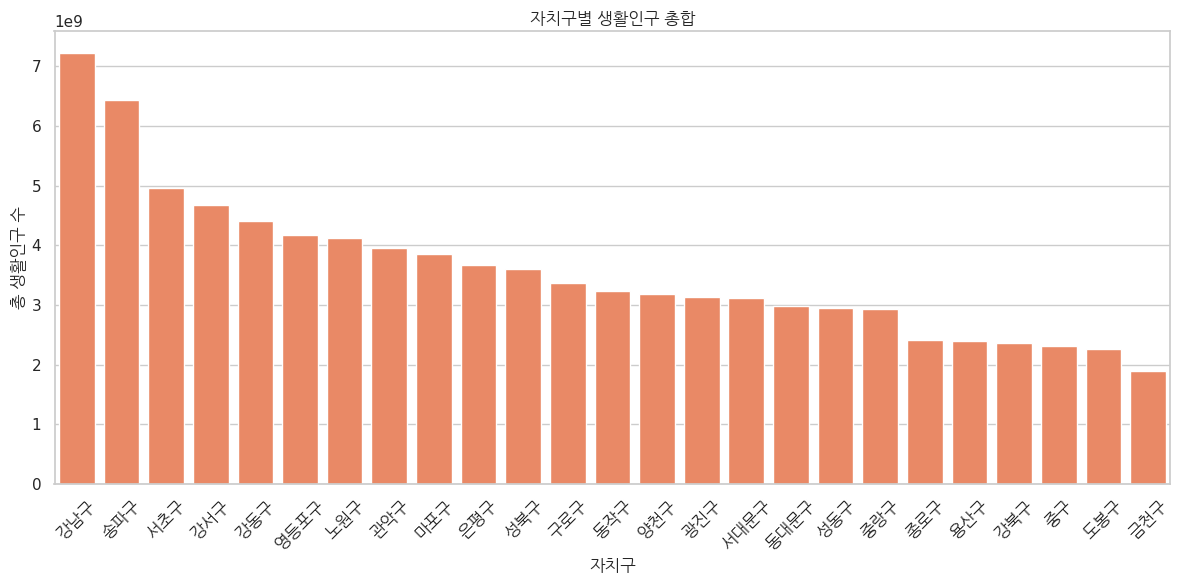

In [30]:

sns.set(style='whitegrid')

# 3. 데이터 정렬
living_sorted = living_df.sort_values(by='total_population', ascending=False)

# 4. 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=living_sorted, x='gu_name', y='total_population', color='coral')

# 5. 텍스트에 한글 폰트 적용
plt.xticks(rotation=45, fontproperties=fontprop)
plt.title('자치구별 생활인구 총합', fontproperties=fontprop)
plt.xlabel('자치구', fontproperties=fontprop)
plt.ylabel('총 생활인구 수', fontproperties=fontprop)

plt.tight_layout()
plt.show()

/tmp/ipykernel_8608/1819697447.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)
/tmp/ipykernel_8608/1819697447.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pop = pd.read_sql(query_pop, conn)


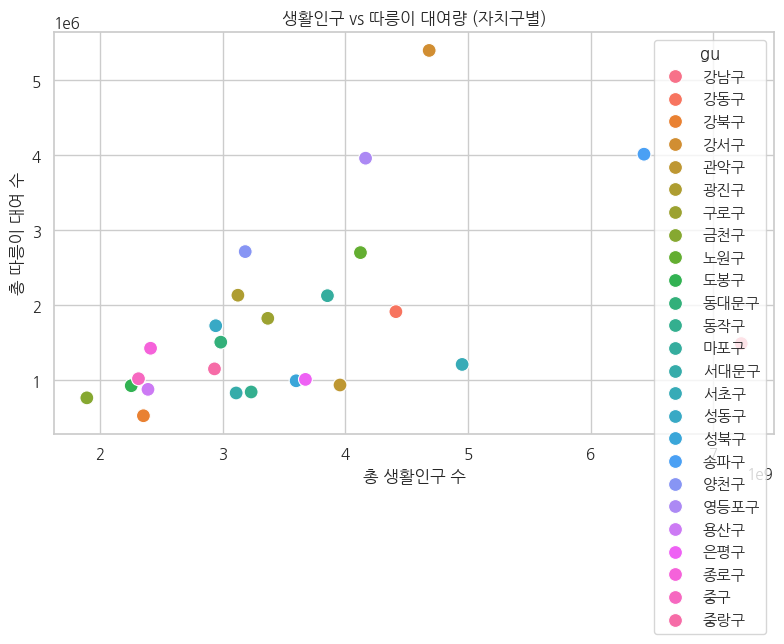

In [35]:

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 2. global 설정
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False


# 📌 두 쿼리 실행해서 각각 DataFrame으로 가져오기
query_rental = """
SELECT station_gu AS gu, SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
query_pop = """
SELECT gu_name AS gu, SUM(
    age_0_9 + age_10 + age_15 + age_20 + age_25 +
    age_30 + age_35 + age_40 + age_45 + age_50 +
    age_55 + age_60 + age_65 + age_70
) AS total_population
FROM living_population
GROUP BY gu_name;
"""

df_rental = pd.read_sql(query_rental, conn)
df_pop = pd.read_sql(query_pop, conn)

# ✅ 두 데이터 병합
df_merge = pd.merge(df_rental, df_pop, on='gu')

# ✅ 산점도 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merge, x='total_population', y='total_rentals', hue='gu', s=100)

plt.title('생활인구 vs 따릉이 대여량 (자치구별)', fontproperties=fontprop)
plt.xlabel('총 생활인구 수', fontproperties=fontprop)
plt.ylabel('총 따릉이 대여 수', fontproperties=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_8608/871150383.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


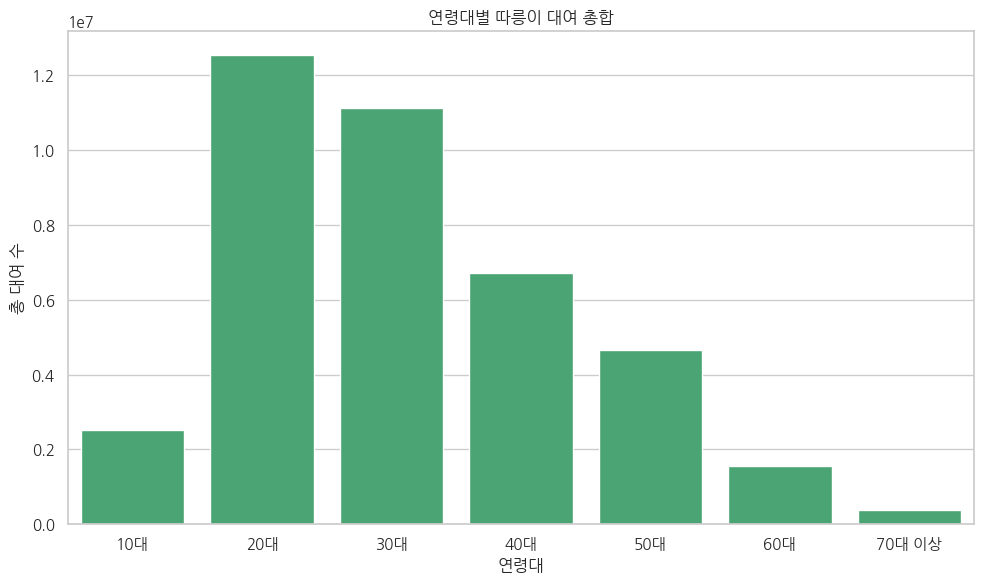

In [37]:

conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# 2. ✅ SQL 쿼리 실행 (연령대별 자치구 따릉이 대여 합계)
query = """
SELECT
    s.station_gu AS gu_name,
    r.age_group,
    SUM(r.total_rentals) AS total_rentals
FROM rental_age_station_summary r
JOIN station s
  ON r.rental_station_id = s.station_id
GROUP BY s.station_gu, r.age_group
ORDER BY s.station_gu, r.age_group;
"""

df = pd.read_sql(query, conn)
conn.close()

# 3. ✅ 전처리: '알 수 없음' 제외, '70대' + '80대 이상' → '70대 이상'
df = df[df['age_group'] != '알 수 없음'].copy()
df['age_group'] = df['age_group'].replace({
    '70대': '70대 이상',
    '80대 이상': '70대 이상'
})

# 4. ✅ 연령대별 전체 대여수 집계
age_summary = df.groupby('age_group')['total_rentals'].sum().reset_index()

# 5. ✅ 연령대 순서 정리
age_order = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']
age_summary['age_group'] = pd.Categorical(age_summary['age_group'], categories=age_order, ordered=True)
age_summary = age_summary.sort_values('age_group')

# 6. ✅ 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 7. ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=age_summary, x='age_group', y='total_rentals', color='mediumseagreen')
plt.title('연령대별 따릉이 대여 총합', fontproperties=fontprop)
plt.xlabel('연령대', fontproperties=fontprop)
plt.ylabel('총 대여 수', fontproperties=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_8608/2372872464.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pop = pd.read_sql(query_population, conn)
/tmp/ipykernel_8608/2372872464.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (Pearson r): 0.4053


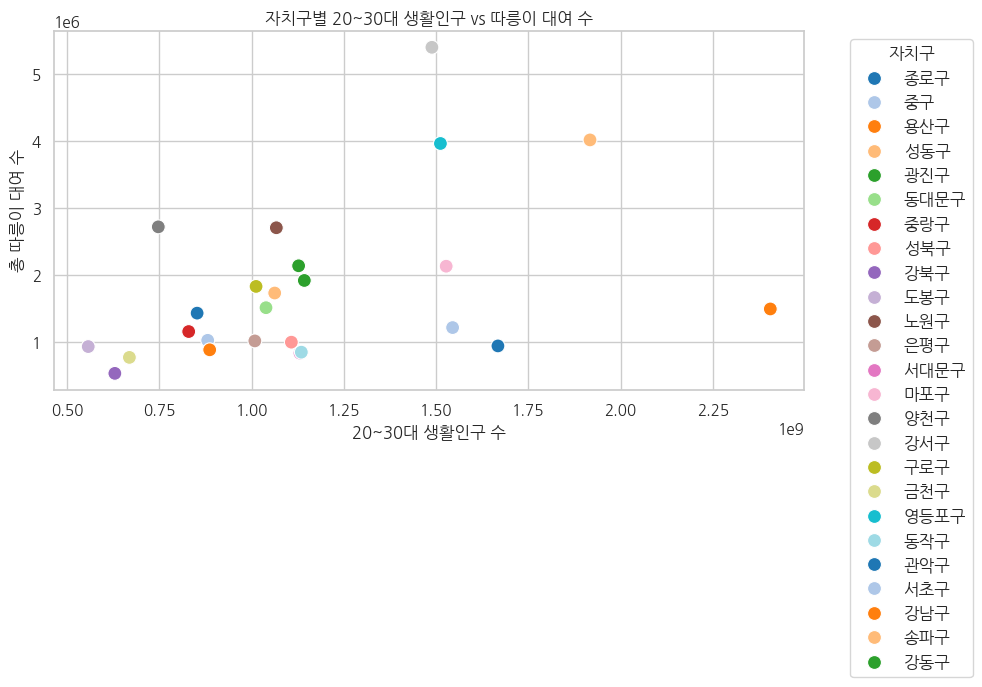

In [38]:

from scipy.stats import pearsonr

# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 1. 20~30대 생활인구 추출
query_population = """
SELECT 
    gu_name,
    SUM(age_20 + age_25 + age_30 + age_35) AS young_population
FROM living_population
GROUP BY gu_name;
"""
df_pop = pd.read_sql(query_population, conn)

# ✅ 2. 자치구별 따릉이 대여량 추출
query_rental = """
SELECT 
    station_gu AS gu_name,
    SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 3. 두 데이터 병합 (자치구 기준)
merged_df = pd.merge(df_pop, df_rental, on='gu_name')

# ✅ 4. 상관계수 출력
corr, _ = pearsonr(merged_df['young_population'], merged_df['total_rentals'])
print(f"📌 상관계수 (Pearson r): {corr:.4f}")

# ✅ 5. 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ 6. 시각화 (산점도)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='young_population',
    y='total_rentals',
    hue='gu_name',
    palette='tab20',
    s=100
)

plt.title('자치구별 20~30대 생활인구 vs 따릉이 대여 수', fontproperties=fontprop)
plt.xlabel('20~30대 생활인구 수', fontproperties=fontprop)
plt.ylabel('총 따릉이 대여 수', fontproperties=fontprop)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_8608/3713501774.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pop = pd.read_sql(query_population, conn)
/tmp/ipykernel_8608/3713501774.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (20~30대 비율 vs 대여 수): -0.1190


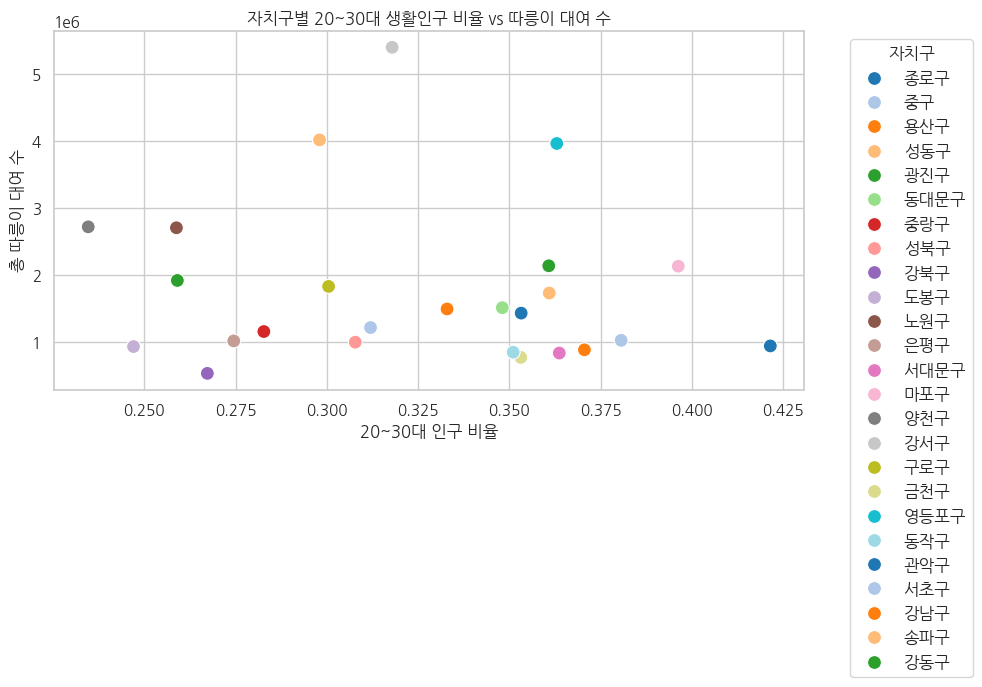

In [45]:
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 1. 20~30대 & 전체 생활인구 추출
query_population = """
SELECT 
    gu_name,
    SUM(age_20 + age_25 + age_30 + age_35) AS young_population,
    SUM(age_0_9 + age_10 + age_15 + age_20 + age_25 +
        age_30 + age_35 + age_40 + age_45 + age_50 +
        age_55 + age_60 + age_65 + age_70) AS total_population
FROM living_population
GROUP BY gu_name;
"""
df_pop = pd.read_sql(query_population, conn)

# ✅ 2. 자치구별 따릉이 대여 수
query_rental = """
SELECT 
    station_gu AS gu_name,
    SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 3. 데이터 병합 및 20~30대 비율 계산
merged_df = pd.merge(df_pop, df_rental, on='gu_name')
merged_df['young_ratio'] = merged_df['young_population'] / merged_df['total_population']

# ✅ 4. 상관계수 계산
corr, _ = pearsonr(merged_df['young_ratio'], merged_df['total_rentals'])
print(f"📌 상관계수 (20~30대 비율 vs 대여 수): {corr:.4f}")

# ✅ 5. 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ 6. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='young_ratio',
    y='total_rentals',
    hue='gu_name',
    palette='tab20',
    s=100
)

plt.title('자치구별 20~30대 생활인구 비율 vs 따릉이 대여 수', fontproperties=fontprop)
plt.xlabel('20~30대 인구 비율', fontproperties=fontprop)
plt.ylabel('총 따릉이 대여 수', fontproperties=fontprop)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontprop)
plt.tight_layout()
plt.show()

/tmp/ipykernel_8608/1395682372.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pop = pd.read_sql(query_population, conn)
/tmp/ipykernel_8608/1395682372.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (20~30대 비율 vs 1인당 대여 수): -0.0781


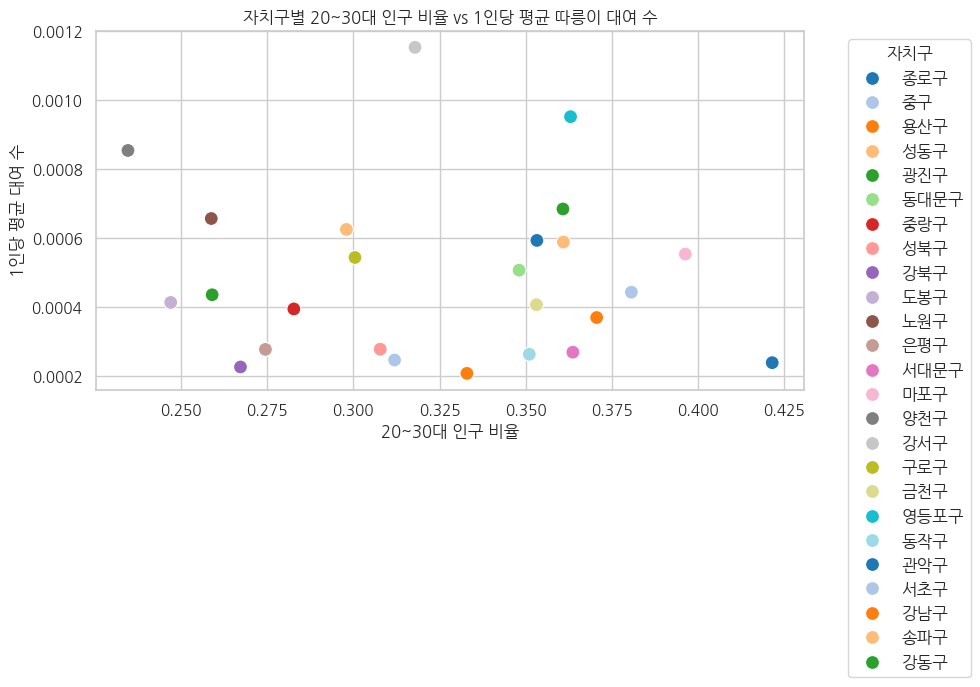

In [49]:
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 생활인구 데이터 (20~30대와 전체)
query_population = """
SELECT 
    gu_name,
    SUM(age_20 + age_25 + age_30 + age_35) AS young_population,
    SUM(age_0_9 + age_10 + age_15 + age_20 + age_25 +
        age_30 + age_35 + age_40 + age_45 + age_50 +
        age_55 + age_60 + age_65 + age_70) AS total_population
FROM living_population
GROUP BY gu_name;
"""
df_pop = pd.read_sql(query_population, conn)

# ✅ 자치구별 따릉이 대여량
query_rental = """
SELECT 
    station_gu AS gu_name,
    SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)
conn.close()

# ✅ 데이터 병합 및 계산
merged_df = pd.merge(df_pop, df_rental, on='gu_name')
merged_df['young_ratio'] = merged_df['young_population'] / merged_df['total_population']
merged_df['rental_per_capita'] = merged_df['total_rentals'] / merged_df['total_population']

# ✅ 상관계수 계산
corr, _ = pearsonr(merged_df['young_ratio'], merged_df['rental_per_capita'])
print(f"📌 상관계수 (20~30대 비율 vs 1인당 대여 수): {corr:.4f}")

# ✅ 시각화
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='young_ratio',
    y='rental_per_capita',
    hue='gu_name',
    palette='tab20',
    s=100
)
plt.title('자치구별 20~30대 인구 비율 vs 1인당 평균 따릉이 대여 수', fontproperties=fontprop)
plt.xlabel('20~30대 인구 비율', fontproperties=fontprop)
plt.ylabel('1인당 평균 대여 수', fontproperties=fontprop)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontprop)
plt.tight_layout()
plt.show()

/tmp/ipykernel_8608/3642094841.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pop = pd.read_sql(query_population, conn)
/tmp/ipykernel_8608/3642094841.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


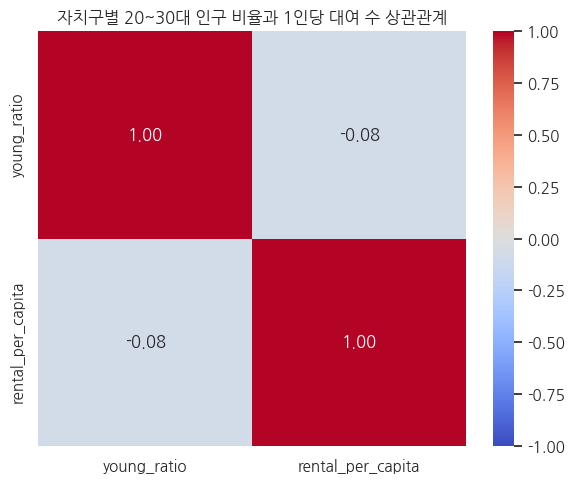

In [51]:
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 1. 전체 생활인구와 20~30대 인구 추출
query_population = """
SELECT 
    gu_name,
    SUM(age_20 + age_25 + age_30 + age_35) AS young_population,
    SUM(age_0_9 + age_10 + age_15 + age_20 + age_25 +
        age_30 + age_35 + age_40 + age_45 + age_50 +
        age_55 + age_60 + age_65 + age_70) AS total_population
FROM living_population
GROUP BY gu_name;
"""
df_pop = pd.read_sql(query_population, conn)

# ✅ 2. 자치구별 총 따릉이 대여량
query_rental = """
SELECT 
    station_gu AS gu_name,
    SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)
conn.close()

# ✅ 3. 병합 및 파생변수 생성
merged_df = pd.merge(df_pop, df_rental, on='gu_name')
merged_df['young_ratio'] = merged_df['young_population'] / merged_df['total_population']
merged_df['rental_per_capita'] = merged_df['total_rentals'] / merged_df['total_population']

# ✅ 4. 상관관계 히트맵 그리기
corr_matrix = merged_df[['young_ratio', 'rental_per_capita']].corr()

# ✅ 5. 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ 6. 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

plt.title("자치구별 20~30대 인구 비율과 1인당 대여 수 상관관계", fontproperties=fontprop)
plt.tight_layout()
plt.show()

/tmp/ipykernel_8608/420455261.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pop = pd.read_sql(query_population, conn)
/tmp/ipykernel_8608/420455261.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


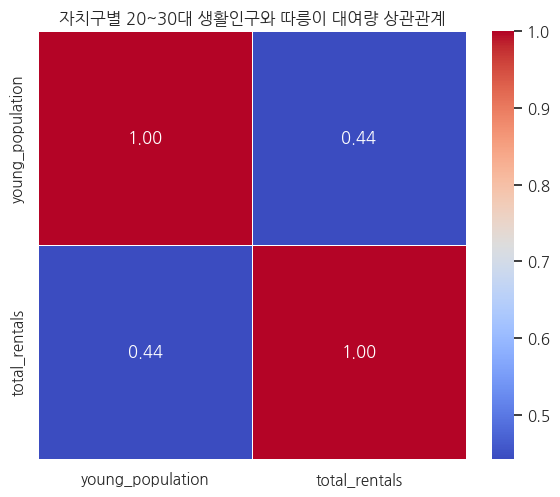

In [43]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# ✅ 1. MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 2. 20~30대 생활인구 (자치구별)
query_population = """
SELECT 
    gu_name,
    SUM(age_20 + age_25 + age_30 + age_35) AS young_population
FROM living_population
GROUP BY gu_name;
"""
df_pop = pd.read_sql(query_population, conn)

# ✅ 3. 20~30대 따릉이 대여량 (자치구별)
query_rental = """
SELECT 
    s.station_gu AS gu_name,
    SUM(r.total_rentals) AS total_rentals
FROM rental_age_station_summary r
JOIN station s ON r.rental_station_id = s.station_id
WHERE r.age_group IN ('20대', '30대')
GROUP BY s.station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)
conn.close()

# ✅ 4. 병합
merged_df = pd.merge(df_pop, df_rental, on='gu_name')

# ✅ 5. 상관계수 계산
corr_df = merged_df[['young_population', 'total_rentals']].corr()

# ✅ 6. 한글 폰트 설정
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

# ✅ 7. 히트맵 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)
plt.title("자치구별 20~30대 생활인구와 따릉이 대여량 상관관계", fontproperties=fontprop)
plt.tight_layout()
plt.show()


/tmp/ipykernel_8608/3841556526.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_age = pd.read_sql(query_avg_age, conn)
/tmp/ipykernel_8608/3841556526.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


📌 상관계수 (평균 연령 vs 1인당 따릉이 대여 수): -0.0513


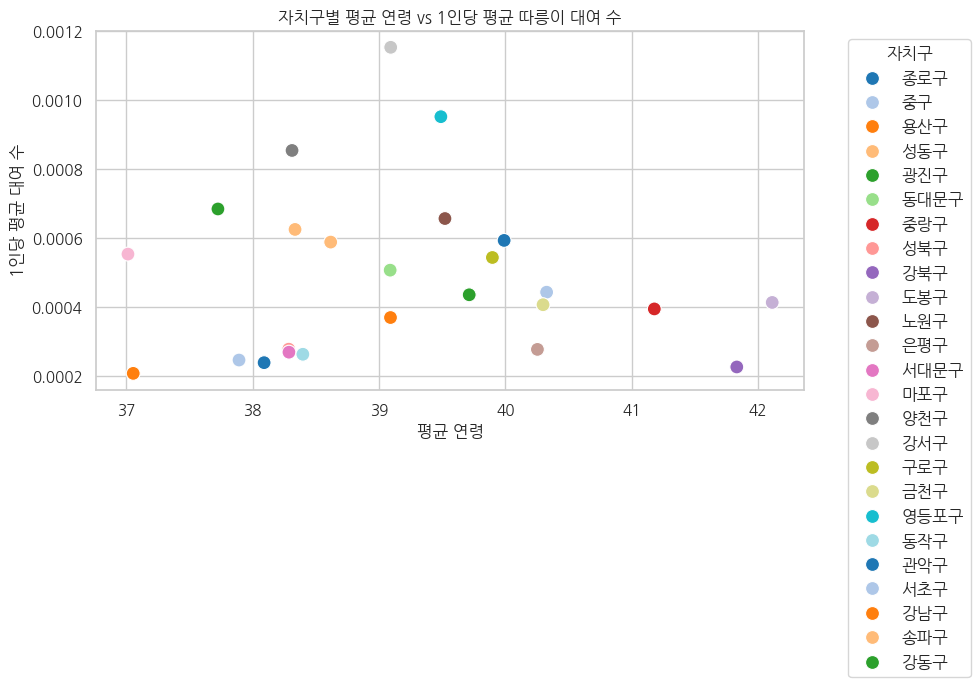

In [52]:
# ✅ MySQL 연결
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 1. 구별 평균 연령 및 총 인구수 계산
query_avg_age = """
SELECT 
    gu_name,
    SUM(
        age_0_9 * 5 + 
        age_10 * 10 + age_15 * 15 + age_20 * 20 + age_25 * 25 +
        age_30 * 30 + age_35 * 35 + age_40 * 40 + age_45 * 45 +
        age_50 * 50 + age_55 * 55 + age_60 * 60 + age_65 * 65 +
        age_70 * 70
    ) / SUM(
        age_0_9 + age_10 + age_15 + age_20 + age_25 + age_30 + age_35 + 
        age_40 + age_45 + age_50 + age_55 + age_60 + age_65 + age_70
    ) AS avg_age,
    SUM(
        age_0_9 + age_10 + age_15 + age_20 + age_25 + age_30 + age_35 + 
        age_40 + age_45 + age_50 + age_55 + age_60 + age_65 + age_70
    ) AS total_population
FROM living_population
GROUP BY gu_name;
"""
df_age = pd.read_sql(query_avg_age, conn)

# ✅ 2. 구별 총 대여량
query_rental = """
SELECT 
    station_gu AS gu_name,
    SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)

conn.close()

# ✅ 3. 병합 및 1인당 평균 대여 수 계산
merged_df = pd.merge(df_age, df_rental, on="gu_name")
merged_df["rental_per_capita"] = merged_df["total_rentals"] / merged_df["total_population"]

# ✅ 4. 상관계수 계산
corr, _ = pearsonr(merged_df["avg_age"], merged_df["rental_per_capita"])
print(f"📌 상관계수 (평균 연령 vs 1인당 따릉이 대여 수): {corr:.4f}")

# ✅ 5. 시각화 (산점도)
font_path = "/home/kbj/Downloads/godic/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x="avg_age",
    y="rental_per_capita",
    hue="gu_name",
    palette="tab20",
    s=100
)

plt.title("자치구별 평균 연령 vs 1인당 평균 따릉이 대여 수", fontproperties=fontprop)
plt.xlabel("평균 연령", fontproperties=fontprop)
plt.ylabel("1인당 평균 대여 수", fontproperties=fontprop)
plt.legend(title="자치구", bbox_to_anchor=(1.05, 1), loc="upper left", prop=fontprop)
plt.tight_layout()
plt.show()

In [53]:
conn = mysql.connector.connect(
    host="jinhyuk2db.c94oygiiukcg.ap-northeast-2.rds.amazonaws.com",
    port=3306,
    user="root",
    password="jinhyuk2dacibul",
    database="project1"
)

# ✅ 평균 연령 및 전체 생활인구 쿼리
query_age = """
SELECT 
    gu_name,
    (
        SUM(age_0_9 * 5 + age_10 * 10 + age_15 * 15 + age_20 * 22 + age_25 * 27 +
            age_30 * 32 + age_35 * 37 + age_40 * 42 + age_45 * 47 + age_50 * 52 +
            age_55 * 57 + age_60 * 62 + age_65 * 67 + age_70 * 75)
    ) / (
        SUM(age_0_9 + age_10 + age_15 + age_20 + age_25 +
            age_30 + age_35 + age_40 + age_45 + age_50 +
            age_55 + age_60 + age_65 + age_70)
    ) AS avg_age,
    SUM(
        age_0_9 + age_10 + age_15 + age_20 + age_25 +
        age_30 + age_35 + age_40 + age_45 + age_50 +
        age_55 + age_60 + age_65 + age_70
    ) AS total_population
FROM living_population
GROUP BY gu_name;
"""
df_age = pd.read_sql(query_age, conn)

# ✅ 자치구별 따릉이 대여량 쿼리
query_rental = """
SELECT 
    station_gu AS gu_name,
    SUM(rental_count) AS total_rentals
FROM rental_hourly_gu_summary
GROUP BY station_gu;
"""
df_rental = pd.read_sql(query_rental, conn)

# ✅ MySQL 연결 종료
conn.close()

# ✅ 병합 및 1인당 대여 수 계산
merged_df = pd.merge(df_age, df_rental, on="gu_name")
merged_df["rental_per_capita"] = merged_df["total_rentals"] / merged_df["total_population"]

# ✅ 결과 출력
print(merged_df)

/tmp/ipykernel_8608/1046747939.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_age = pd.read_sql(query_age, conn)
/tmp/ipykernel_8608/1046747939.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rental = pd.read_sql(query_rental, conn)


   gu_name    avg_age  total_population  total_rentals  rental_per_capita
0      종로구  42.070921      2.413340e+09      1429459.0           0.000592
1       중구  42.425555      2.315050e+09      1023360.0           0.000442
2      용산구  41.127468      2.392453e+09       881559.0           0.000368
3      성동구  40.624659      2.944546e+09      1729795.0           0.000587
4      광진구  39.688022      3.125262e+09      2136280.0           0.000684
5     동대문구  41.157923      2.985572e+09      1510629.0           0.000506
6      중랑구  43.264256      2.934242e+09      1154434.0           0.000393
7      성북구  40.263887      3.599612e+09       995770.0           0.000277
8      강북구  43.982520      2.355259e+09       529876.0           0.000225
9      도봉구  44.241424      2.255988e+09       930054.0           0.000412
10     노원구  41.508234      4.123796e+09      2704465.0           0.000656
11     은평구  42.294745      3.675441e+09      1014312.0           0.000276
12    서대문구  40.309678      3.110726e+0